<a href="https://colab.research.google.com/github/ilinthm26/Luminar/blob/main/SalesCustomerExcerise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PLOT DIFFERENT CHARTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r'/content/sales_cus.csv')
df

,Order_ID,Order_Date,Month,Region,City,Product,Category,Quantity,Unit_Price,Sales,Discount_%,Profit,Customer_Type
0,1001,05-01-2024,Jan,South,Kochi,Laptop,Electronics,2,55000,110000,5,15000,Retail
1,1002,06-03-2024,Mar,South,Trivandrum,Mobile,Electronics,5,18000,90000,10,12000,Corporate
2,1003,06-03-2024,Mar,North,Delhi,Chair,Furniture,10,3500,35000,8,7000,Retail
3,1004,07-01-2024,Jan,West,Mumbai,Table,Furniture,4,12000,48000,5,9000,Corporate
4,1005,08-04-2024,Apr,South,Kochi,Headset,Accessories,15,2000,30000,12,6000,Retail
5,1006,09-02-2024,Feb,East,Kolkata,Laptop,Electronics,1,56000,56000,3,8000,Corporate
6,1007,09-02-2024,Feb,West,Pune,Mobile,Electronics,3,19000,57000,6,9000,Retail
7,1008,10-04-2024,Apr,North,Noida,Chair,Furniture,8,3400,27200,7,5000,Retail
8,1009,11-04-2024,Apr,South,Trivandrum,Tablet,Electronics,4,25000,100000,5,11000,Corporate
9,1010,12-05-2024,May,East,Bhubaneswar,Mouse,Accessories,20,800,16000,10,3000,Retail


# Questions

- Show total sales trend by order date ('Line chart')

- total sales by category - bar chart

- total profit by region - hor bar chart

- Monthly sales trend

- Quantity sold by Product

- average discount by category

- Tob 5 Profitable products

- Quantity vs Sales - scatter plot

- Discount % vs profit

# Show total sales trend by order date ('Line chart')


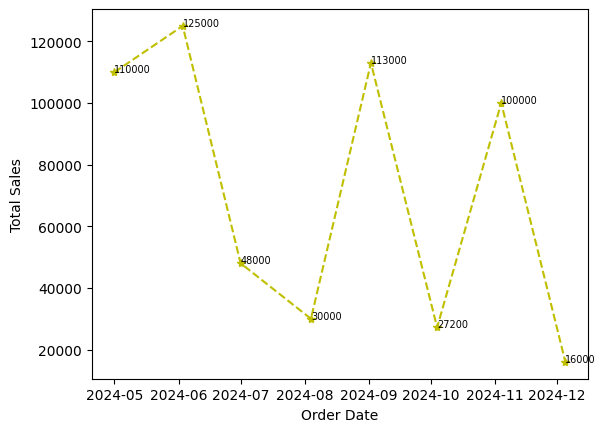

In [16]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],format='mixed')
df1 = df.groupby('Order_Date')['Sales'].sum()
plt.plot(df1.index,df1.values,'y--*')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
for x,y in zip(df1.index,df1.values):
  plt.text(x,y,str(y),ha='left',size=7)

#  Total Sales by Category

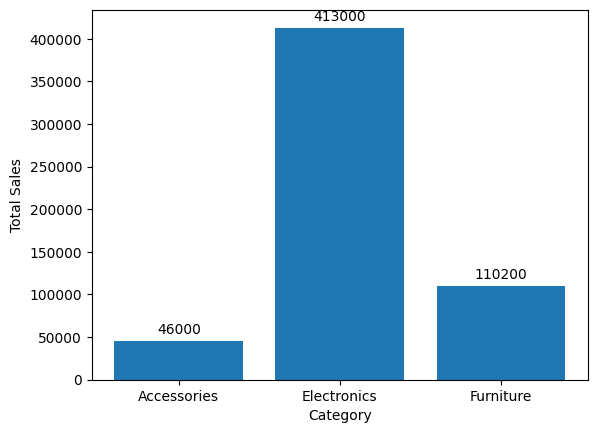

In [19]:
df2 = df.groupby('Category')['Sales'].sum()
plt.bar(df2.index,df2.values)
plt.xlabel('Category')
plt.ylabel('Total Sales')

for x,y in zip(df2.index,df2.values):
  plt.annotate(y,
               (x,y),
               textcoords='offset points',
               xytext=(0,5),
               ha='center')

 # Total Profit by Region

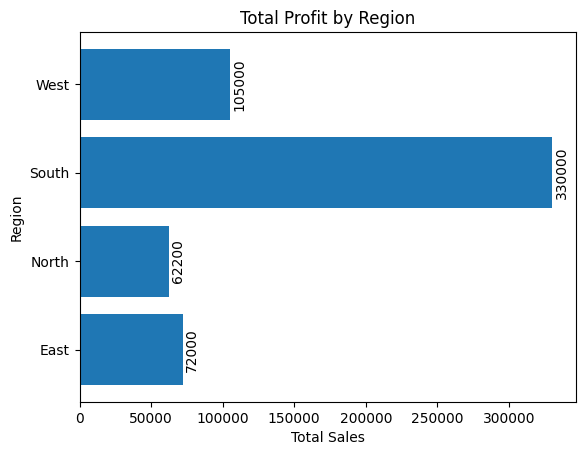

In [5]:
df3 = df.groupby('Region')['Sales'].sum()
plt.barh(df3.index,df3.values)
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.title('Total Profit by Region')

for y,x in zip(df3.index,df3.values):
  plt.annotate(x,
               (x,y),
               textcoords='offset points',
               xytext=(2,0),
               va='center',
               rotation=90


               )

# Monthly Sales Trend

In [17]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

df['Month'] = pd.Categorical(df['Month'],
                             categories=month_order,
                             ordered=True)


/tmp/ipython-input-1121747991.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4=df.groupby('Month')['Sales'].sum()


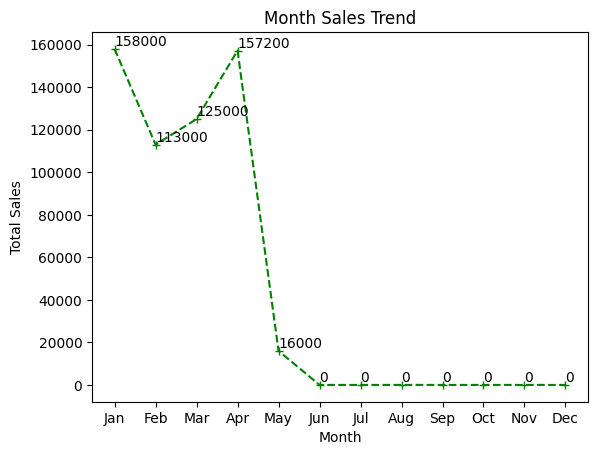

In [18]:
df4=df.groupby('Month')['Sales'].sum()
df4=df4.sort_index()
plt.plot(df4.index,df4.values,'g--+')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month Sales Trend')

for x,y in zip(df4.index,df4.values):
  plt.text(x,y,str(y),ha='left',va='bottom')

# Quantity sold by Product

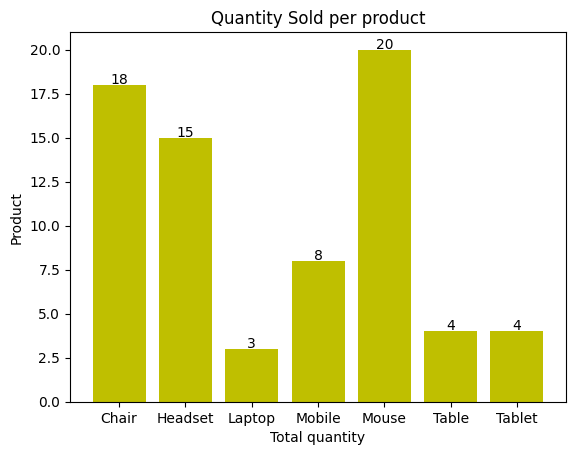

In [8]:
df5=df.groupby('Product')['Quantity'].sum()
plt.bar(df5.index,df5.values,color='y')
plt.xlabel('Total quantity')
plt.ylabel('Product')
plt.title('Quantity Sold per product')

for x, y in zip(df5.index, df5.values):
    plt.annotate(y,
                 (x, y),
                 textcoords="offset points",
                 xytext=(0,1),
                 ha='center')

# Average Discount by Category

Text(0.5, 1.0, 'Average Discount by Category')

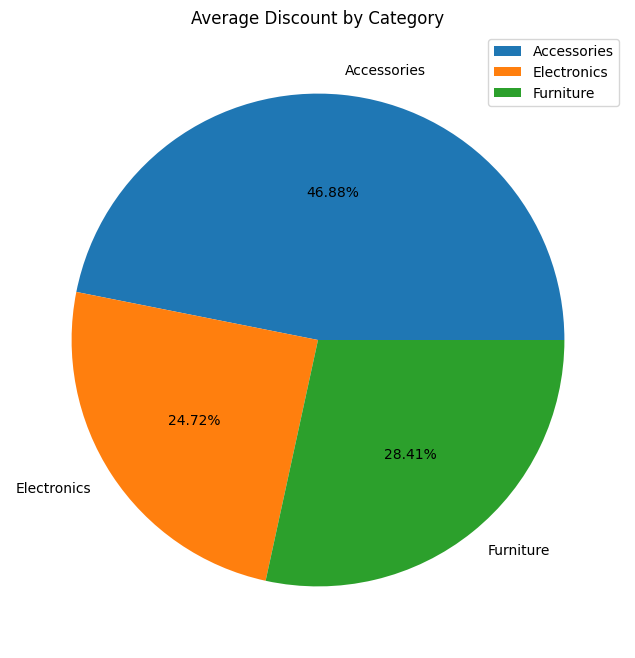

In [9]:
df6=df.groupby('Category')['Discount_%'].mean()
plt.figure(figsize=(16,8))
plt.pie(df6,labels=df6.index,autopct='%1.2f%%')
plt.legend(loc='best')
plt.title('Average Discount by Category')

# Tob 5 Profitable products

Text(0.5, 1.0, 'Tob 5 Profitable products')

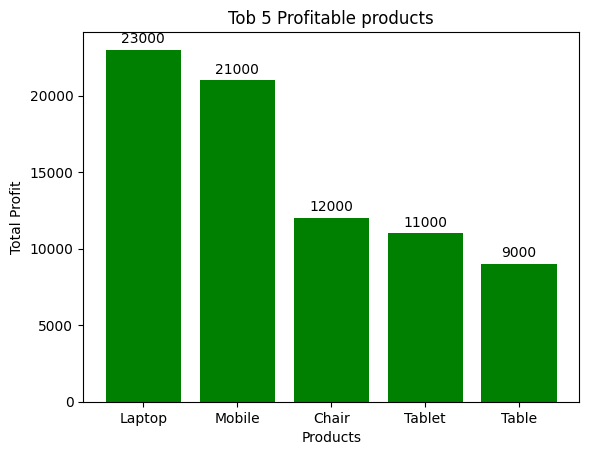

In [10]:
df7=df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(5)
plt.bar(df7.index,df7.values,color='g')
plt.xlabel('Products')
plt.ylabel('Total Profit')
for x,y in zip(df7.index,df7.values):
  plt.annotate(y,
               (x,y),
               textcoords='offset points',
               xytext=(0,5),
               ha='center')
plt.title('Tob 5 Profitable products')

# Quantity vs Sales

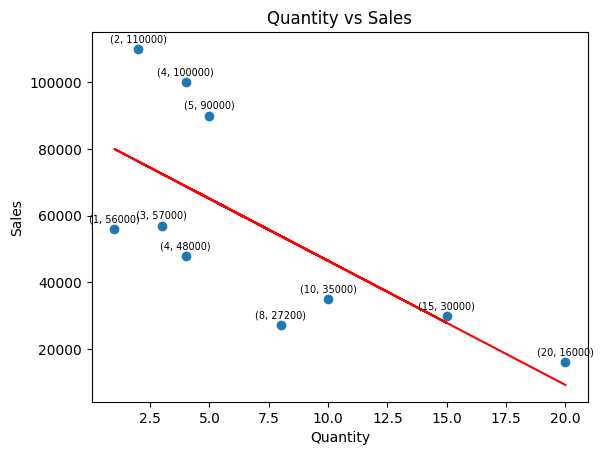

In [11]:
plt.scatter(df['Quantity'],df['Sales'])
plt.title('Quantity vs Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')

for x,y in zip(df['Quantity'],df['Sales']):
  plt.annotate((x,y),
               (x,y),
               textcoords='offset points',
               xytext=(0,5),
               ha='center',
               size=7)

m, b = np.polyfit(df['Quantity'], df['Sales'], 1)
plt.plot(df['Quantity'], m*np.array(df['Quantity']) + b, color='red')

# Discount % vs profit

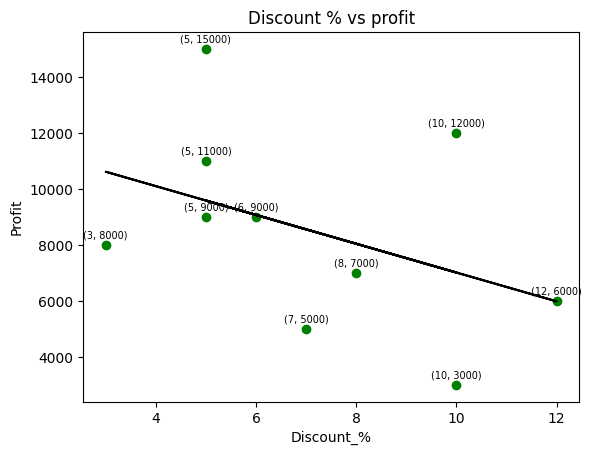

In [12]:
plt.scatter(df['Discount_%'],df['Profit'],color='g')
plt.title('Discount % vs profit')
plt.xlabel('Discount_%')
plt.ylabel('Profit')
for x,y in zip(df['Discount_%'],df['Profit']):
  plt.annotate(
      (x,y),
      (x,y),
      textcoords='offset points',
      xytext=(0,5),
     ha='center',
      size=7
  )
m,b=np.polyfit(df['Discount_%'],df['Profit'],1)
plt.plot(df['Discount_%'],m*np.array(df['Discount_%'])+b,color='k')